In [1]:
import pandas as pd
import numpy as np
# %pip install imblearn

In [2]:
## Reading the Dataset
df = pd.read_csv('C:/Users/ansari/Desktop/LB_Assign/Project/YourCabs.csv')

## Peeking at the data
df.head(10)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0
5,132518,17712,12,NaN,2,1021.0,1323.0,NaN,NaN,1/1/2013 22:30,NaN,0,0,1/1/2013 8:01,13.028530,77.546250,12.869805,77.653211,0
6,132519,22172,12,NaN,1,571.0,NaN,15.0,108.0,1/1/2013 9:45,41275.40625,0,0,1/1/2013 9:21,12.951850,77.696420,NaN,NaN,0
7,132520,22181,12,NaN,2,1192.0,832.0,NaN,NaN,1/1/2013 11:00,NaN,0,0,1/1/2013 9:39,12.976770,77.572700,12.880190,77.645580,0
8,132521,22182,65,2.0,3,448.0,NaN,NaN,NaN,1/1/2013 16:00,NaN,0,0,1/1/2013 9:44,12.927320,77.635750,NaN,NaN,0
9,132522,22184,12,NaN,2,516.0,376.0,NaN,NaN,1/1/2013 11:00,NaN,0,0,1/1/2013 9:49,13.005600,77.657990,12.902450,77.660810,0


In [3]:
df.tail(10)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
43421,185931,48723,12,NaN,2,1371.0,1181.0,15.0,NaN,11/25/2013 9:45,41603.43118,0,0,11/24/2013 14:10,13.000418,77.674835,12.978960,77.67345,0
43422,185932,48724,12,NaN,2,393.0,269.0,15.0,NaN,11/24/2013 21:15,41602.98345,0,0,11/24/2013 14:12,13.199560,77.706880,12.974400,77.69183,1
43423,185933,48725,24,NaN,2,585.0,339.0,15.0,NaN,11/24/2013 16:00,41602.70913,0,1,11/24/2013 14:15,12.976770,77.572700,12.910280,77.64512,0
43424,185935,48726,12,2.0,3,515.0,NaN,15.0,NaN,11/24/2013 15:15,41603.01042,0,0,11/24/2013 14:23,12.978960,77.673450,NaN,NaN,0
43425,185936,30220,12,NaN,2,585.0,1226.0,15.0,NaN,11/25/2013 0:00,41603.03336,0,1,11/24/2013 14:24,12.976770,77.572700,13.015080,77.67796,0
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,41602.82020,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.59088,0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,41604.08037,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.64458,0
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,41602.97917,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,41602.69495,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.62289,0
43430,185941,48730,12,NaN,2,689.0,393.0,15.0,NaN,11/25/2013 5:00,41603.25385,0,1,11/24/2013 14:50,12.976720,77.649270,13.199560,77.70688,0


In [4]:
## Verifying the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

In [5]:
## Since, the 'from_date' and 'booking_created' are datetime columns in string format. 
## By changing the column into datetime format, we can extraxt various features from it like day, month, year and time
df['from_date'] = pd.to_datetime(df['from_date'])

## Year
df['from_year'] = df['from_date'].dt.year

## Month
df['from_month'] = df['from_date'].dt.month

## Day
from_day = []
for i in df['from_date']:
    from_day.append(i.day_name())
df['from_day'] = pd.Series(from_day)

## Time
from_time = []
for i in df['from_date'].dt.hour:
    if 4<= i < 8:
        from_time.append('Early_Morning')
    elif 8<= i < 12:
        from_time.append('Morning')
    elif 12<= i < 16:
        from_time.append('Afternoon')
    elif 16<= i < 24:
        from_time.append('Evening')
    elif 0<= i < 4 :
        from_time.append('Night')
df['from_time'] = pd.Series(from_time)

In [6]:
df['booking_created']= pd.to_datetime(df['booking_created'])

## Year
df['booking_year'] = df['booking_created'].dt.year

## Month
df['booking_month'] = df['booking_created'].dt.month

## Day
booking_day = []
for i in df['booking_created']:
    booking_day.append(i.day_name())
df['booking_day'] = pd.Series(booking_day)

## Time
booking_time = []
for i in df['booking_created'].dt.hour:
    if 4<= i < 8:
        booking_time.append('Early_Morning')
    elif 8<= i < 12:
        booking_time.append('Morning')
    elif 12<= i < 16:
        booking_time.append('Afternoon')
    elif 16<= i < 24:
        booking_time.append('Evening')
    elif 0<= i < 4 :
        booking_time.append('Night')
df['booking_time'] = pd.Series(booking_time)

In [7]:
df

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,to_long,Car_Cancellation,from_year,from_month,from_day,from_time,booking_year,booking_month,booking_day,booking_time
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,...,77.635750,0,2013,1,Tuesday,Night,2013,1,Tuesday,Night
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,...,77.626640,0,2013,1,Tuesday,Morning,2013,1,Tuesday,Night
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,...,77.597766,0,2013,1,Tuesday,Night,2013,1,Tuesday,Night
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,...,77.639140,0,2013,1,Tuesday,Early_Morning,2013,1,Tuesday,Early_Morning
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,...,77.600720,0,2013,1,Tuesday,Morning,2013,1,Tuesday,Early_Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,2013-11-24 18:00:00,...,77.590880,0,2013,11,Sunday,Evening,2013,11,Sunday,Afternoon
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,2013-11-26 01:00:00,...,77.644580,0,2013,11,Tuesday,Night,2013,11,Sunday,Afternoon
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,2013-11-24 18:30:00,...,NaN,0,2013,11,Sunday,Evening,2013,11,Sunday,Afternoon
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,2013-11-24 16:00:00,...,77.622890,0,2013,11,Sunday,Evening,2013,11,Sunday,Afternoon


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   43431 non-null  int64         
 1   user_id              43431 non-null  int64         
 2   vehicle_model_id     43431 non-null  int64         
 3   package_id           7550 non-null   float64       
 4   travel_type_id       43431 non-null  int64         
 5   from_area_id         43343 non-null  float64       
 6   to_area_id           34293 non-null  float64       
 7   from_city_id         16345 non-null  float64       
 8   to_city_id           1588 non-null   float64       
 9   from_date            43431 non-null  datetime64[ns]
 10  to_date              25541 non-null  float64       
 11  online_booking       43431 non-null  int64         
 12  mobile_site_booking  43431 non-null  int64         
 13  booking_created      43431 non-

In [9]:
## Cleaning the Data
## Dropping the columns with more than 10% of missing values
df= df.drop( axis = 1,columns=['package_id','to_city_id','booking_created','from_date','from_city_id','to_lat','to_long','to_area_id','to_date'])
df

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_lat,from_long,Car_Cancellation,from_year,from_month,from_day,from_time,booking_year,booking_month,booking_day,booking_time
0,132512,22177,28,2,83.0,0,0,12.924150,77.672290,0,2013,1,Tuesday,Night,2013,1,Tuesday,Night
1,132513,21413,12,2,1010.0,0,0,12.966910,77.749350,0,2013,1,Tuesday,Morning,2013,1,Tuesday,Night
2,132514,22178,12,2,1301.0,0,0,12.937222,77.626915,0,2013,1,Tuesday,Night,2013,1,Tuesday,Night
3,132515,13034,12,2,768.0,0,0,12.989990,77.553320,0,2013,1,Tuesday,Early_Morning,2013,1,Tuesday,Early_Morning
4,132517,22180,12,2,1365.0,0,0,12.845653,77.677925,0,2013,1,Tuesday,Morning,2013,1,Tuesday,Early_Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,2,1147.0,1,0,13.030640,77.649100,0,2013,11,Sunday,Evening,2013,11,Sunday,Afternoon
43427,185938,48727,12,2,393.0,1,0,13.199560,77.706880,0,2013,11,Tuesday,Night,2013,11,Sunday,Afternoon
43428,185939,48729,12,3,974.0,0,0,13.075570,77.559040,0,2013,11,Sunday,Evening,2013,11,Sunday,Afternoon
43429,185940,30724,87,2,1263.0,0,0,12.968970,77.594560,0,2013,11,Sunday,Evening,2013,11,Sunday,Afternoon


In [10]:
## Re-Indexing the columns
index = ['id','user_id','vehicle_model_id','travel_type_id','from_area_id','from_year','from_month','from_day','from_time','online_booking','mobile_site_booking','booking_year','booking_month','booking_day','booking_time','from_lat','from_long','Car_Cancellation']
df=df.reindex(columns=index)
df

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,from_year,from_month,from_day,from_time,online_booking,mobile_site_booking,booking_year,booking_month,booking_day,booking_time,from_lat,from_long,Car_Cancellation
0,132512,22177,28,2,83.0,2013,1,Tuesday,Night,0,0,2013,1,Tuesday,Night,12.924150,77.672290,0
1,132513,21413,12,2,1010.0,2013,1,Tuesday,Morning,0,0,2013,1,Tuesday,Night,12.966910,77.749350,0
2,132514,22178,12,2,1301.0,2013,1,Tuesday,Night,0,0,2013,1,Tuesday,Night,12.937222,77.626915,0
3,132515,13034,12,2,768.0,2013,1,Tuesday,Early_Morning,0,0,2013,1,Tuesday,Early_Morning,12.989990,77.553320,0
4,132517,22180,12,2,1365.0,2013,1,Tuesday,Morning,0,0,2013,1,Tuesday,Early_Morning,12.845653,77.677925,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,2,1147.0,2013,11,Sunday,Evening,1,0,2013,11,Sunday,Afternoon,13.030640,77.649100,0
43427,185938,48727,12,2,393.0,2013,11,Tuesday,Night,1,0,2013,11,Sunday,Afternoon,13.199560,77.706880,0
43428,185939,48729,12,3,974.0,2013,11,Sunday,Evening,0,0,2013,11,Sunday,Afternoon,13.075570,77.559040,0
43429,185940,30724,87,2,1263.0,2013,11,Sunday,Evening,0,0,2013,11,Sunday,Afternoon,12.968970,77.594560,0


In [11]:
## Splitting the Data into Features and Target
X = df.iloc[:,1:17]
Y = df.iloc[:,17]

In [12]:
## Splitting the data into training and testing

## Importing the required library
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y, train_size= 0.7, random_state= 10)

In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30401 entries, 37475 to 17673
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              30401 non-null  int64  
 1   vehicle_model_id     30401 non-null  int64  
 2   travel_type_id       30401 non-null  int64  
 3   from_area_id         30347 non-null  float64
 4   from_year            30401 non-null  int64  
 5   from_month           30401 non-null  int64  
 6   from_day             30401 non-null  object 
 7   from_time            30401 non-null  object 
 8   online_booking       30401 non-null  int64  
 9   mobile_site_booking  30401 non-null  int64  
 10  booking_year         30401 non-null  int64  
 11  booking_month        30401 non-null  int64  
 12  booking_day          30401 non-null  object 
 13  booking_time         30401 non-null  object 
 14  from_lat             30344 non-null  float64
 15  from_long            30344 non-n

In [14]:
## Data Cleaning
## Checking for missing values for training data and testing data simultanously
x_train.isnull().sum()

user_id                 0
vehicle_model_id        0
travel_type_id          0
from_area_id           54
from_year               0
from_month              0
from_day                0
from_time               0
online_booking          0
mobile_site_booking     0
booking_year            0
booking_month           0
booking_day             0
booking_time            0
from_lat               57
from_long              57
dtype: int64

In [15]:
x_train.isnull().sum()/x_train.shape[0]*100

user_id                0.000000
vehicle_model_id       0.000000
travel_type_id         0.000000
from_area_id           0.177626
from_year              0.000000
from_month             0.000000
from_day               0.000000
from_time              0.000000
online_booking         0.000000
mobile_site_booking    0.000000
booking_year           0.000000
booking_month          0.000000
booking_day            0.000000
booking_time           0.000000
from_lat               0.187494
from_long              0.187494
dtype: float64

In [16]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13030 entries, 22965 to 38572
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              13030 non-null  int64  
 1   vehicle_model_id     13030 non-null  int64  
 2   travel_type_id       13030 non-null  int64  
 3   from_area_id         12996 non-null  float64
 4   from_year            13030 non-null  int64  
 5   from_month           13030 non-null  int64  
 6   from_day             13030 non-null  object 
 7   from_time            13030 non-null  object 
 8   online_booking       13030 non-null  int64  
 9   mobile_site_booking  13030 non-null  int64  
 10  booking_year         13030 non-null  int64  
 11  booking_month        13030 non-null  int64  
 12  booking_day          13030 non-null  object 
 13  booking_time         13030 non-null  object 
 14  from_lat             12994 non-null  float64
 15  from_long            12994 non-n

In [17]:
x_test.isnull().sum()

user_id                 0
vehicle_model_id        0
travel_type_id          0
from_area_id           34
from_year               0
from_month              0
from_day                0
from_time               0
online_booking          0
mobile_site_booking     0
booking_year            0
booking_month           0
booking_day             0
booking_time            0
from_lat               36
from_long              36
dtype: int64

In [18]:
## Missing Value Treatment for training as well as testing data 
## Since, all three columns with missing values are in float format we will impute the null values with the median of their respective columns

x_train['from_area_id'] = x_train['from_area_id'].fillna(df['from_area_id'].median())

x_train['from_lat'] = x_train['from_lat'].fillna(df['from_lat'].median())

x_train['from_long'] = x_train['from_long'].fillna(df['from_long'].median())

x_train.isnull().sum()

## Now, there are no null values in our dataset

user_id                0
vehicle_model_id       0
travel_type_id         0
from_area_id           0
from_year              0
from_month             0
from_day               0
from_time              0
online_booking         0
mobile_site_booking    0
booking_year           0
booking_month          0
booking_day            0
booking_time           0
from_lat               0
from_long              0
dtype: int64

In [19]:
x_test['from_area_id'] = x_test['from_area_id'].fillna(df['from_area_id'].median())

x_test['from_lat'] = x_test['from_lat'].fillna(df['from_lat'].median())

x_test['from_long'] = x_test['from_long'].fillna(df['from_long'].median())

x_test.isnull().sum()

user_id                0
vehicle_model_id       0
travel_type_id         0
from_area_id           0
from_year              0
from_month             0
from_day               0
from_time              0
online_booking         0
mobile_site_booking    0
booking_year           0
booking_month          0
booking_day            0
booking_time           0
from_lat               0
from_long              0
dtype: int64

## Outlier treatment
- From the boxplot, we can see that there are some columns with outliers

<AxesSubplot:>

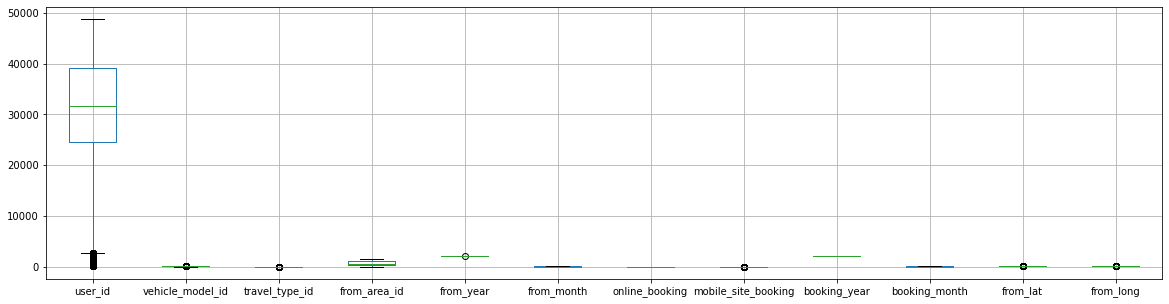

In [20]:
x_train.boxplot(figsize= '20,5')

- Now, we will check individually every column for outliers

<AxesSubplot:>

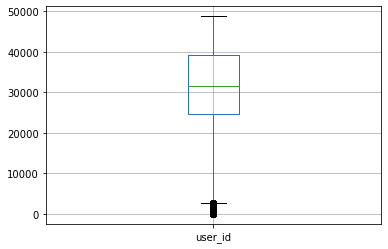

In [21]:
x_train.boxplot('user_id')

In [22]:
def user_outlier(train_test):
    q1 = train_test['user_id'].quantile(0.25)
    q3 = train_test['user_id'].quantile(0.75)
    IQR = q3-q1
    UL = q3 + 1.5*IQR
    LL =  q1 - 1.5*IQR
    print(f'q1={q1}, q3={q3}, IQR={IQR}, UL={UL}, LL={LL}')
    
    ## Checking the Outlier Count
    
    upper_count = train_test[train_test['user_id']>UL].shape[0]
    lower_count = train_test[train_test['user_id']<LL].shape[0]
    outlier_percent = ((upper_count+lower_count)/train_test.shape[0])*100
    print(f'outlier_count= {upper_count+lower_count}, outlier_percent={outlier_percent}')
    
    ## The percentage of outliers is below 5%, so we will change it with its closest value within range i.e. between UL & LL
    
    min_user = train_test['user_id'][train_test['user_id']>LL].min()
    max_user = train_test['user_id'][train_test['user_id']<UL].max()
    print(min_user,max_user)
    
    train_test['user_id'].replace([i for i in train_test['user_id'] if i<LL] , min_user , inplace=True)
    return train_test['user_id']
    
user_outlier(x_train)

q1=24618.0, q3=39198.0, IQR=14580.0, UL=61068.0, LL=2748.0
outlier_count= 976, outlier_percent=3.2104207098450708
2752 48730


37475    45008
18       17226
10802    28972
24461    39859
43046    48496
         ...  
40059    46618
28017    39487
29199    40288
40061    46620
17673    33549
Name: user_id, Length: 30401, dtype: int64

In [23]:
(x_train['user_id']<2748).value_counts()

False    30401
Name: user_id, dtype: int64

<AxesSubplot:>

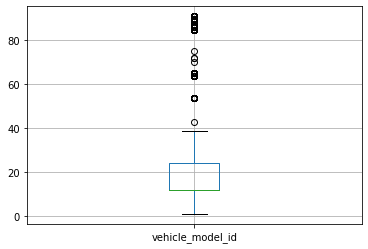

In [24]:
x_train.boxplot('vehicle_model_id')

In [25]:
def vehicle_model_outlier(train_test):
    q1 = train_test['vehicle_model_id'].quantile(0.25)
    q3 = train_test['vehicle_model_id'].quantile(0.75)
    IQR = q3-q1
    UL = q3 + 1.5*IQR
    LL =  q1 - 1.5*IQR
    print(f'q1={q1}, q3={q3}, IQR={IQR}, UL={UL}, LL={LL}')
    
    ## Checking the Outlier Count
    
    lower_count = train_test[ train_test['vehicle_model_id']< LL].shape[0]
    upper_count = train_test[ train_test['vehicle_model_id']> UL].shape[0]
    outlier_percent = ((upper_count+lower_count)/train_test.shape[0])*100
    print(f'outlier_count= {lower_count+upper_count}, outlier_percent={outlier_percent}')
    
vehicle_model_outlier(x_train)

q1=12.0, q3=24.0, IQR=12.0, UL=42.0, LL=-6.0
outlier_count= 5480, outlier_percent=18.025722838064535


In [26]:
x_train['vehicle_model_id'].value_counts()

12    22354
89     1707
85     1643
65     1323
28     1186
24     1062
87      393
90      209
23      209
86       79
64       63
10       60
54       44
17       26
91       14
30       12
36        6
13        3
72        2
43        1
75        1
39        1
1         1
70        1
14        1
Name: vehicle_model_id, dtype: int64

### Since, this column is a nominal categorical type, we can't just treat the outliers directly. 
### So, we will collect all the datapoints with less than 5% of total dps and change them to most occurring dps randomly.

In [27]:


most_vehicles = [12,89,85,65,28,24]
for i in x_train['vehicle_model_id']:
    if i not in most_vehicles:
        x_train.vehicle_model_id.replace(i,np.random.choice(most_vehicles,p=[1/6,1/6,1/6,1/6,1/6,1/6]),inplace= True)
x_train['vehicle_model_id'].value_counts()

12    23043
89     1771
85     1644
65     1571
28     1249
24     1123
Name: vehicle_model_id, dtype: int64

<AxesSubplot:>

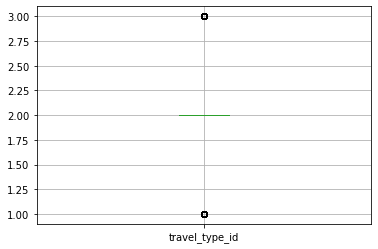

In [28]:
x_train.boxplot('travel_type_id')

In [29]:
x_train['travel_type_id'].value_counts()

2    24056
3     5246
1     1099
Name: travel_type_id, dtype: int64

<AxesSubplot:ylabel='Frequency'>

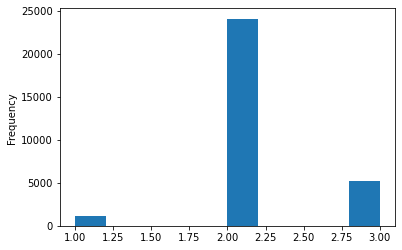

In [30]:
x_train['travel_type_id'].plot.hist()

<AxesSubplot:>

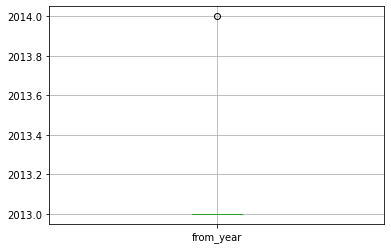

In [31]:
x_train.boxplot('from_year')

In [32]:
## There is only one row with year 2014
print(x_train['from_year'].value_counts())
x_train.loc[x_train['from_year']==2014]

## So we are dropping that row
x_train.drop(41241,inplace=True)
y_train.drop(41241,inplace=True)

## Since, 'from_year' and 'booking_year' now only contains 2013 so we will drop these columns
x_train.drop(columns=['from_year','booking_year'],inplace=True)

2013    30400
2014        1
Name: from_year, dtype: int64


In [33]:
x_train['mobile_site_booking'].value_counts()

0    29098
1     1302
Name: mobile_site_booking, dtype: int64

<AxesSubplot:>

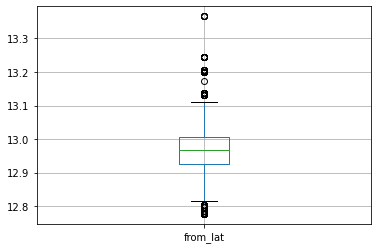

In [34]:
x_train.boxplot('from_lat')

In [35]:
x_train['from_lat'].value_counts()

13.199560    2707
12.951850    1160
12.976770     766
12.849482     739
12.924150     658
             ... 
12.972450       1
12.968553       1
12.968170       1
12.946000       1
12.959498       1
Name: from_lat, Length: 455, dtype: int64

In [36]:
def lat_outlier(train_test):
    q1 = train_test['from_lat'].quantile(0.25)
    q3 = train_test['from_lat'].quantile(0.75)
    IQR = q3-q1
    UL = q3 + 1.5*IQR
    LL =  q1 - 1.5*IQR
    print(f'q1={q1}, q3={q3}, IQR={IQR}, UL={UL}, LL={LL}')
    
    ## Checking the Outlier Count
    
    upper_count = train_test[train_test['from_lat']>UL].shape[0]
    lower_count = train_test[train_test['from_lat']<LL].shape[0]
    outlier_percent = ((upper_count+lower_count)/train_test.shape[0])*100
    print(f'outlier_count= {upper_count+lower_count}, outlier_percent={outlier_percent}')
    
    ## The percentage of outliers is below 10%, so we will change it with its closest value within range i.e. between UL & LL
    
    min_lat = train_test['from_lat'][train_test['from_lat']>LL].min()
    max_lat = train_test['from_lat'][train_test['from_lat']<UL].max()
    print(min_lat,max_lat)
    
    train_test['from_lat'].replace([i for i in train_test['from_lat'] if i<LL] , min_lat , inplace=True)
    train_test['from_lat'].replace([i for i in train_test['from_lat'] if i>UL] , max_lat , inplace=True)
    return train_test['from_lat']
    
lat_outlier(x_train)

q1=12.92645, q3=13.005603, IQR=0.0791529999999998, UL=13.124332500000001, LL=12.807720500000002
outlier_count= 2845, outlier_percent=9.358552631578949
12.81575 13.11084


37475    12.965190
18       12.966545
10802    12.832201
24461    12.971650
43046    12.974408
           ...    
40059    12.964620
28017    13.110840
29199    12.971430
40061    12.956410
17673    12.976770
Name: from_lat, Length: 30400, dtype: float64

<AxesSubplot:>

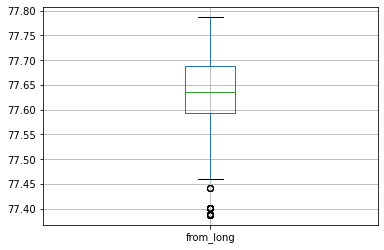

In [37]:
x_train.boxplot('from_long')

In [38]:
def long_outlier(train_test):
    q1 = train_test['from_long'].quantile(0.25)
    q3 = train_test['from_long'].quantile(0.75)
    IQR = q3-q1
    UL = q3 + 1.5*IQR
    LL =  q1 - 1.5*IQR
    print(f'q1={q1}, q3={q3}, IQR={IQR}, UL={UL}, LL={LL}')
    
    ## Checking the Outlier Count
    
    upper_count = train_test[train_test['from_long']>UL].shape[0]
    lower_count = train_test[train_test['from_long']<LL].shape[0]
    outlier_percent = ((upper_count+lower_count)/train_test.shape[0])*100
    print(f'outlier_count= {upper_count+lower_count}, outlier_percent={outlier_percent}')
    
    ## The percentage of outliers is below 5%, so we will change it with its closest value within range i.e. between UL & LL
    
    min_long = train_test['from_long'][train_test['from_long']>LL].min()
    max_long = train_test['from_long'][train_test['from_long']<UL].max()
    print(min_long,max_long)
    
    train_test['from_long'].replace([i for i in train_test['from_long'] if i<LL] , min_long , inplace=True)
    train_test['from_long'].replace([i for i in train_test['from_long'] if i>UL] , max_long , inplace=True)
    return train_test['from_long']
    
long_outlier(x_train)

q1=77.593189, q3=77.68779, IQR=0.09460100000001148, UL=77.82969150000002, LL=77.45128749999998
outlier_count= 34, outlier_percent=0.11184210526315788
77.45876 77.78642


37475    77.719320
18       77.711639
10802    77.678208
24461    77.513160
43046    77.664800
           ...    
40059    77.687790
28017    77.706880
29199    77.639140
40061    77.640760
17673    77.572700
Name: from_long, Length: 30400, dtype: float64

### Similarly, doing outlier treatment for testing data

<AxesSubplot:>

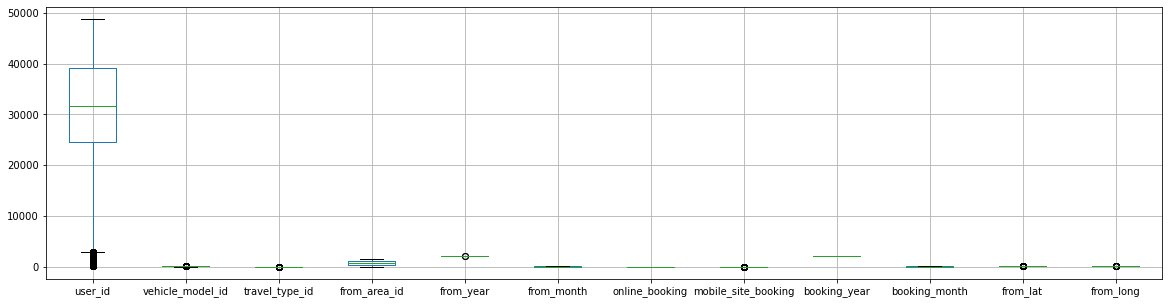

In [39]:
x_test.boxplot(figsize= '20,5')

<AxesSubplot:>

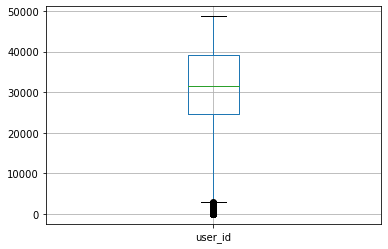

In [40]:
x_test.boxplot('user_id')

- Using same functions used for train data

In [41]:
## Same function used for training data
user_outlier(x_test)

q1=24597.75, q3=39093.5, IQR=14495.75, UL=60837.125, LL=2854.125
outlier_count= 444, outlier_percent=3.40752110514198
2858 48726


22965    37303
21315    29275
9089     27858
20545    30290
9042     13887
         ...  
10844    29044
12272    29987
872      15094
37945    23433
38572    45473
Name: user_id, Length: 13030, dtype: int64

In [42]:
(x_test['user_id']<2748).value_counts()

False    13030
Name: user_id, dtype: int64

<AxesSubplot:>

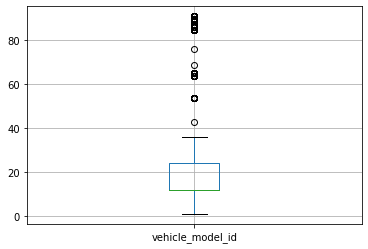

In [43]:
x_test.boxplot('vehicle_model_id')

In [44]:
vehicle_model_outlier(x_test)

q1=12.0, q3=24.0, IQR=12.0, UL=42.0, LL=-6.0
outlier_count= 2421, outlier_percent=18.580199539524177


In [45]:
x_test['vehicle_model_id'].value_counts()

12    9505
85     764
89     684
65     589
28     516
24     432
87     172
90     103
23      88
10      44
86      44
54      29
64      22
17      14
91      11
13       4
36       3
30       2
43       1
1        1
76       1
69       1
Name: vehicle_model_id, dtype: int64

In [46]:
## Since, this column is a nominal categorical type, we can't just treat the outliers directly. 
## So, we will collect all the datapoints with less than 5% of total dps and change them to most occurring dps randomly.

most_vehicles = [12,89,85,65,28,24]
for i in x_test['vehicle_model_id']:
    if i not in most_vehicles:
        x_test.vehicle_model_id.replace(i,np.random.choice(most_vehicles,p=[1/6,1/6,1/6,1/6,1/6,1/6]),inplace= True)
x_test['vehicle_model_id'].value_counts()

12    9607
89     881
85     776
65     677
28     653
24     436
Name: vehicle_model_id, dtype: int64

<AxesSubplot:>

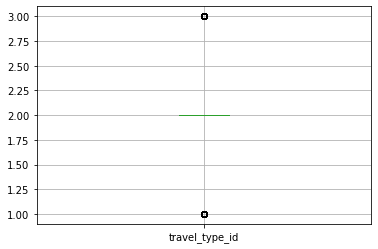

In [47]:
x_test.boxplot('travel_type_id')

In [48]:
x_test['travel_type_id'].value_counts()

2    10236
3     2304
1      490
Name: travel_type_id, dtype: int64

<AxesSubplot:>

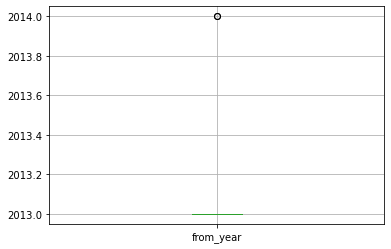

In [49]:
x_test.boxplot('from_year')

In [50]:
## There are only two rows with year 2014
print(x_test['from_year'].value_counts())
display(x_test.loc[x_test['from_year']==2014])

# So we are dropping that rows
x_test.drop([42970,42925],axis='index',inplace=True)
y_test.drop([42970,42925],axis='index', inplace = True)

## Since, 'from_year' and 'booking_year' now only contains 2013 so we will drop these columns
x_test.drop(columns=['from_year','booking_year'],inplace=True)

2013    13028
2014        2
Name: from_year, dtype: int64


,user_id,vehicle_model_id,travel_type_id,from_area_id,from_year,from_month,from_day,from_time,online_booking,mobile_site_booking,booking_year,booking_month,booking_day,booking_time,from_lat,from_long
42970,48418,12,2,1145.0,2014,2,Saturday,Early_Morning,0,0,2013,11,Wednesday,Evening,13.03241,77.59914
42925,42840,12,2,393.0,2014,2,Friday,Afternoon,0,0,2013,11,Wednesday,Morning,13.19956,77.70688


In [51]:
x_test['mobile_site_booking'].value_counts()

0    12452
1      576
Name: mobile_site_booking, dtype: int64

<AxesSubplot:>

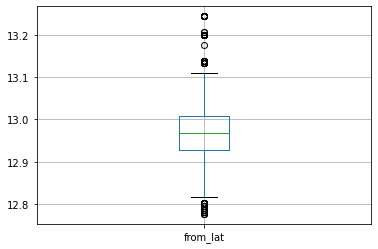

In [52]:
x_test.boxplot('from_lat')

In [53]:
x_test['from_lat'].value_counts()

13.199560    1150
12.951850     471
12.976770     314
12.849482     313
12.924150     302
             ... 
12.963180       1
12.879678       1
12.957324       1
13.062130       1
12.963190       1
Name: from_lat, Length: 433, dtype: int64

In [54]:
lat_outlier(x_test)

q1=12.92732, q3=13.00826, IQR=0.08094000000000001, UL=13.12967, LL=12.80591
outlier_count= 1217, outlier_percent=9.34141848326681
12.81575 13.11084


22965    12.999874
21315    12.912260
9089     12.910280
20545    12.901840
9042     12.933310
           ...    
10844    13.037255
12272    12.951850
872      13.030170
37945    13.000418
38572    13.110840
Name: from_lat, Length: 13028, dtype: float64

<AxesSubplot:>

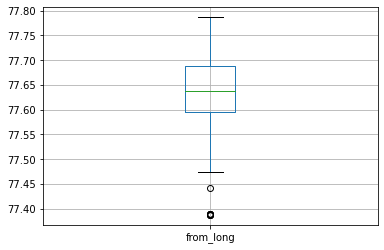

In [55]:
x_test.boxplot('from_long')

In [56]:
long_outlier(x_test)

q1=77.5948, q3=77.6889, IQR=0.09409999999999741, UL=77.83005, LL=77.45365000000001
outlier_count= 8, outlier_percent=0.06140620202640467
77.473672 77.78642


22965    77.678120
21315    77.597730
9089     77.645120
20545    77.581587
9042     77.566660
           ...    
10844    77.581660
12272    77.696420
872      77.566840
37945    77.674835
38572    77.706880
Name: from_long, Length: 13028, dtype: float64

## Statistical Summary of the training data


In [57]:
x_train.describe(include='object')

,from_day,from_time,booking_day,booking_time
count,30400,30400,30400,30400
unique,7,5,7,5
top,Friday,Evening,Friday,Evening
freq,4911,10606,5165,13527


In [58]:
x_train.describe(include = 'float64')

,from_area_id,from_lat,from_long
count,30400.000000,30400.000000,30400.000000
mean,713.699178,12.974162,77.636030
std,418.877914,0.066974,0.059217
min,2.000000,12.815750,77.458760
25%,393.000000,12.926450,77.593189
50%,590.000000,12.967990,77.635750
75%,1089.000000,13.005603,77.687790
max,1401.000000,13.110840,77.786420


In [59]:
x_train.describe(include = 'int64')

,user_id,vehicle_model_id,travel_type_id,from_month,online_booking,mobile_site_booking,booking_month
count,30400.000000,30400.000000,30400.000000,30400.000000,30400.000000,30400.000000,30400.000000
mean,30805.448454,24.273092,2.136447,6.472829,0.350921,0.042829,6.420000
std,10854.973674,25.376804,0.435973,2.944365,0.477266,0.202475,2.920301
min,2752.000000,12.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,24617.250000,12.000000,2.000000,4.000000,0.000000,0.000000,4.000000
50%,31638.500000,12.000000,2.000000,7.000000,0.000000,0.000000,7.000000
75%,39197.250000,12.000000,2.000000,9.000000,1.000000,0.000000,9.000000
max,48730.000000,89.000000,3.000000,12.000000,1.000000,1.000000,11.000000


## Statistical Summary of the testing data


In [60]:
x_test.describe(include='object')

,from_day,from_time,booking_day,booking_time
count,13028,13028,13028,13028
unique,7,5,7,5
top,Saturday,Evening,Friday,Evening
freq,2152,4565,2186,5808


In [61]:
x_test.describe(include='int64')

,user_id,vehicle_model_id,travel_type_id,from_month,online_booking,mobile_site_booking,booking_month
count,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,30754.124578,25.512895,2.139239,6.471676,0.353162,0.044212,6.417639
std,10867.309862,26.446786,0.441689,2.937732,0.477971,0.205575,2.911512
min,2858.000000,12.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,24595.250000,12.000000,2.000000,4.000000,0.000000,0.000000,4.000000
50%,31601.000000,12.000000,2.000000,7.000000,0.000000,0.000000,7.000000
75%,39092.000000,24.000000,2.000000,9.000000,1.000000,0.000000,9.000000
max,48726.000000,89.000000,3.000000,12.000000,1.000000,1.000000,11.000000


In [62]:
x_test.describe(include='float64')

,from_area_id,from_lat,from_long
count,13028.000000,13028.000000,13028.000000
mean,715.676927,12.974817,77.636969
std,420.965764,0.066853,0.058895
min,2.000000,12.815750,77.473672
25%,393.000000,12.927320,77.594800
50%,601.000000,12.968970,77.637162
75%,1095.000000,13.008260,77.688900
max,1403.000000,13.110840,77.786420


<AxesSubplot:>

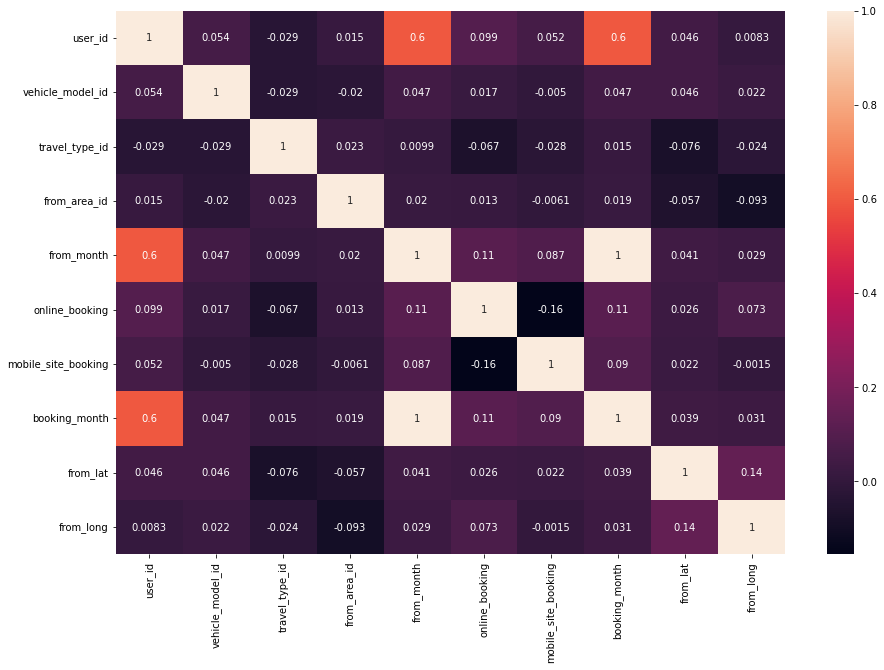

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(x_train.corr(),annot=True,ax= ax)

In [64]:
## We will drop 'booking_month' column as it is 99% similar to 'from_month column'
x_train.drop(columns='booking_month', inplace= True)
x_train

,user_id,vehicle_model_id,travel_type_id,from_area_id,from_month,from_day,from_time,online_booking,mobile_site_booking,booking_day,booking_time,from_lat,from_long
37475,45008,12,2,1096.0,10,Saturday,Early_Morning,1,0,Friday,Evening,12.965190,77.719320
18,17226,12,2,1353.0,1,Tuesday,Evening,0,0,Tuesday,Afternoon,12.966545,77.711639
10802,28972,12,2,1324.0,4,Monday,Afternoon,1,0,Monday,Afternoon,12.832201,77.678208
24461,39859,12,2,667.0,7,Wednesday,Morning,0,0,Thursday,Evening,12.971650,77.513160
43046,48496,65,1,1041.0,11,Monday,Early_Morning,0,0,Thursday,Afternoon,12.974408,77.664800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,46618,12,2,1244.0,10,Wednesday,Evening,1,0,Tuesday,Evening,12.964620,77.687790
28017,39487,89,2,393.0,8,Friday,Morning,1,0,Wednesday,Evening,13.110840,77.706880
29199,40288,12,2,398.0,8,Wednesday,Evening,0,0,Wednesday,Evening,12.971430,77.639140
40061,46620,12,2,271.0,10,Wednesday,Afternoon,1,0,Tuesday,Evening,12.956410,77.640760


In [65]:
x_test.drop(columns='booking_month', inplace= True)
x_test

,user_id,vehicle_model_id,travel_type_id,from_area_id,from_month,from_day,from_time,online_booking,mobile_site_booking,booking_day,booking_time,from_lat,from_long
22965,37303,12,2,455.0,7,Wednesday,Early_Morning,0,0,Monday,Evening,12.999874,77.678120
21315,29275,85,2,433.0,7,Tuesday,Afternoon,0,0,Saturday,Morning,12.912260,77.597730
9089,27858,12,3,339.0,4,Saturday,Morning,0,0,Saturday,Morning,12.910280,77.645120
20545,30290,12,2,1054.0,7,Thursday,Morning,0,0,Monday,Morning,12.901840,77.581587
9042,13887,85,3,112.0,4,Tuesday,Morning,0,0,Friday,Afternoon,12.933310,77.566660
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,29044,12,2,1373.0,4,Tuesday,Early_Morning,1,0,Monday,Evening,13.037255,77.581660
12272,29987,24,2,571.0,5,Sunday,Evening,0,0,Saturday,Afternoon,12.951850,77.696420
872,15094,12,3,1338.0,1,Saturday,Morning,1,0,Friday,Evening,13.030170,77.566840
37945,23433,12,2,1371.0,10,Tuesday,Early_Morning,0,1,Monday,Evening,13.000418,77.674835


## Scaling the dataset using MinMax Scaler

In [66]:
from sklearn.preprocessing import MinMaxScaler
m2s = MinMaxScaler()
x_train_scaled = m2s.fit_transform(x_train[['user_id','vehicle_model_id','travel_type_id','from_month','from_area_id','from_lat','from_long']])
# x_train_scaled = pd.DataFrame(x_train_scaled,columns=['user_id','vehicle_model_id','travel_type_id','from_month','from_area_id','from_lat','from_long'])
x_train_scaled

array([[0.91904824, 0.        , 0.5       , ..., 0.78198713, 0.50642177,
        0.79521455],
       [0.31480273, 0.        , 0.5       , ..., 0.96568978, 0.51101359,
        0.77177257],
       [0.57027274, 0.        , 0.5       , ..., 0.94496069, 0.05574909,
        0.66974303],
       ...,
       [0.81639045, 0.        , 0.5       , ..., 0.28305933, 0.52756786,
        0.55050967],
       [0.95410849, 0.        , 0.5       , ..., 0.1922802 , 0.47666814,
        0.55545382],
       [0.66982035, 0.        , 0.5       , ..., 0.85060758, 0.54566403,
        0.34773851]])

In [67]:
x_train.drop(x_train[['user_id','vehicle_model_id','travel_type_id','from_month','from_area_id','from_lat','from_long']],axis=1,inplace=True)

x_train

,from_day,from_time,online_booking,mobile_site_booking,booking_day,booking_time
37475,Saturday,Early_Morning,1,0,Friday,Evening
18,Tuesday,Evening,0,0,Tuesday,Afternoon
10802,Monday,Afternoon,1,0,Monday,Afternoon
24461,Wednesday,Morning,0,0,Thursday,Evening
43046,Monday,Early_Morning,0,0,Thursday,Afternoon
...,...,...,...,...,...,...
40059,Wednesday,Evening,1,0,Tuesday,Evening
28017,Friday,Morning,1,0,Wednesday,Evening
29199,Wednesday,Evening,0,0,Wednesday,Evening
40061,Wednesday,Afternoon,1,0,Tuesday,Evening


In [68]:
x_train['user_id'] = x_train_scaled[:,0]
x_train['vehicle_model_id'] = x_train_scaled[:,1]
x_train['travel_type_id'] = x_train_scaled[:,2]
x_train['from_month'] = x_train_scaled[:,3]
x_train['from_area_id'] = x_train_scaled[:,4]
x_train['from_lat'] = x_train_scaled[:,5]
x_train['from_long'] = x_train_scaled[:,6]

x_train

,from_day,from_time,online_booking,mobile_site_booking,booking_day,booking_time,user_id,vehicle_model_id,travel_type_id,from_month,from_area_id,from_lat,from_long
37475,Saturday,Early_Morning,1,0,Friday,Evening,0.919048,0.000000,0.5,0.818182,0.781987,0.506422,0.795215
18,Tuesday,Evening,0,0,Tuesday,Afternoon,0.314803,0.000000,0.5,0.000000,0.965690,0.511014,0.771773
10802,Monday,Afternoon,1,0,Monday,Afternoon,0.570273,0.000000,0.5,0.272727,0.944961,0.055749,0.669743
24461,Wednesday,Morning,0,0,Thursday,Evening,0.807060,0.000000,0.5,0.545455,0.475340,0.528313,0.166026
43046,Monday,Early_Morning,0,0,Thursday,Afternoon,0.994911,0.688312,0.0,0.909091,0.742673,0.537660,0.628823
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,Wednesday,Evening,1,0,Tuesday,Evening,0.954065,0.000000,0.5,0.818182,0.887777,0.504490,0.698987
28017,Friday,Morning,1,0,Wednesday,Evening,0.798969,1.000000,0.5,0.636364,0.279485,1.000000,0.757248
29199,Wednesday,Evening,0,0,Wednesday,Evening,0.816390,0.000000,0.5,0.636364,0.283059,0.527568,0.550510
40061,Wednesday,Afternoon,1,0,Tuesday,Evening,0.954108,0.000000,0.5,0.818182,0.192280,0.476668,0.555454


In [69]:
x_test_scaled = m2s.transform(x_test[['user_id','vehicle_model_id','travel_type_id','from_month','from_area_id','from_lat','from_long']])
# x_test_scaled = pd.DataFrame(x_test_scaled,columns=['user_id','vehicle_model_id','travel_type_id','from_month','from_area_id','from_lat','from_long'])
x_test_scaled

array([[0.75146809, 0.        , 0.5       , ..., 0.32380272, 0.62395879,
        0.66947446],
       [0.57686285, 0.94805195, 0.5       , ..., 0.3080772 , 0.32705276,
        0.42412867],
       [0.54604376, 0.        , 1.        , ..., 0.24088635, 0.32034295,
        0.5687603 ],
       ...,
       [0.26843273, 0.        , 1.        , ..., 0.95496783, 0.72662578,
        0.32985412],
       [0.44980208, 0.        , 0.5       , ..., 0.97855611, 0.6258023 ,
        0.65944882],
       [0.92916177, 0.        , 0.5       , ..., 0.27948535, 1.        ,
        0.75724837]])

In [70]:
x_test.drop(x_train[['user_id','vehicle_model_id','travel_type_id','from_month','from_area_id','from_lat','from_long']],axis=1,inplace=True)

x_test

,from_day,from_time,online_booking,mobile_site_booking,booking_day,booking_time
22965,Wednesday,Early_Morning,0,0,Monday,Evening
21315,Tuesday,Afternoon,0,0,Saturday,Morning
9089,Saturday,Morning,0,0,Saturday,Morning
20545,Thursday,Morning,0,0,Monday,Morning
9042,Tuesday,Morning,0,0,Friday,Afternoon
...,...,...,...,...,...,...
10844,Tuesday,Early_Morning,1,0,Monday,Evening
12272,Sunday,Evening,0,0,Saturday,Afternoon
872,Saturday,Morning,1,0,Friday,Evening
37945,Tuesday,Early_Morning,0,1,Monday,Evening


In [71]:
x_test['user_id'] = x_test_scaled[:,0]
x_test['vehicle_model_id'] = x_test_scaled[:,1]
x_test['travel_type_id'] = x_test_scaled[:,2]
x_test['from_month'] = x_test_scaled[:,3]
x_test['from_area_id'] = x_test_scaled[:,4]
x_test['from_lat'] = x_test_scaled[:,5]
x_test['from_long'] = x_test_scaled[:,6]

x_test

,from_day,from_time,online_booking,mobile_site_booking,booking_day,booking_time,user_id,vehicle_model_id,travel_type_id,from_month,from_area_id,from_lat,from_long
22965,Wednesday,Early_Morning,0,0,Monday,Evening,0.751468,0.000000,0.5,0.545455,0.323803,0.623959,0.669474
21315,Tuesday,Afternoon,0,0,Saturday,Morning,0.576863,0.948052,0.5,0.545455,0.308077,0.327053,0.424129
9089,Saturday,Morning,0,0,Saturday,Morning,0.546044,0.000000,1.0,0.272727,0.240886,0.320343,0.568760
20545,Thursday,Morning,0,0,Monday,Morning,0.598939,0.000000,0.5,0.545455,0.751966,0.291742,0.374861
9042,Tuesday,Morning,0,0,Friday,Afternoon,0.242181,0.948052,1.0,0.272727,0.078628,0.398387,0.329305
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,Tuesday,Early_Morning,1,0,Monday,Evening,0.571839,0.000000,0.5,0.272727,0.979986,0.750635,0.375084
12272,Sunday,Evening,0,0,Saturday,Afternoon,0.592349,0.155844,0.5,0.363636,0.406719,0.461215,0.725325
872,Saturday,Morning,1,0,Friday,Evening,0.268433,0.000000,1.0,0.000000,0.954968,0.726626,0.329854
37945,Tuesday,Early_Morning,0,1,Monday,Evening,0.449802,0.000000,0.5,0.818182,0.978556,0.625802,0.659449


## Encoding Categorical data

In [72]:
x_train.describe(include='object')

,from_day,from_time,booking_day,booking_time
count,30400,30400,30400,30400
unique,7,5,7,5
top,Friday,Evening,Friday,Evening
freq,4911,10606,5165,13527


- We have 4 categorical columns in nominal order
- So, we will create dummy variables of these columns for encoding 

In [73]:
def day_dummy(train_test,x):
    dummy = pd.get_dummies(train_test[x])
    train_test[f'{x}_Monday'] = dummy['Monday']
    train_test[f'{x}_Tuesday'] = dummy['Tuesday']
    train_test[f'{x}_Wednesday'] = dummy['Wednesday']
    train_test[f'{x}_Thursday'] = dummy['Thursday']
    train_test[f'{x}_Friday'] = dummy['Friday']
    train_test[f'{x}_Saturday'] = dummy['Saturday']
    train_test[f'{x}_Sunday'] = dummy['Sunday']
    return train_test

In [74]:
day_dummy(x_train,'from_day')

,from_day,from_time,online_booking,mobile_site_booking,booking_day,booking_time,user_id,vehicle_model_id,travel_type_id,from_month,from_area_id,from_lat,from_long,from_day_Monday,from_day_Tuesday,from_day_Wednesday,from_day_Thursday,from_day_Friday,from_day_Saturday,from_day_Sunday
37475,Saturday,Early_Morning,1,0,Friday,Evening,0.919048,0.000000,0.5,0.818182,0.781987,0.506422,0.795215,0,0,0,0,0,1,0
18,Tuesday,Evening,0,0,Tuesday,Afternoon,0.314803,0.000000,0.5,0.000000,0.965690,0.511014,0.771773,0,1,0,0,0,0,0
10802,Monday,Afternoon,1,0,Monday,Afternoon,0.570273,0.000000,0.5,0.272727,0.944961,0.055749,0.669743,1,0,0,0,0,0,0
24461,Wednesday,Morning,0,0,Thursday,Evening,0.807060,0.000000,0.5,0.545455,0.475340,0.528313,0.166026,0,0,1,0,0,0,0
43046,Monday,Early_Morning,0,0,Thursday,Afternoon,0.994911,0.688312,0.0,0.909091,0.742673,0.537660,0.628823,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,Wednesday,Evening,1,0,Tuesday,Evening,0.954065,0.000000,0.5,0.818182,0.887777,0.504490,0.698987,0,0,1,0,0,0,0
28017,Friday,Morning,1,0,Wednesday,Evening,0.798969,1.000000,0.5,0.636364,0.279485,1.000000,0.757248,0,0,0,0,1,0,0
29199,Wednesday,Evening,0,0,Wednesday,Evening,0.816390,0.000000,0.5,0.636364,0.283059,0.527568,0.550510,0,0,1,0,0,0,0
40061,Wednesday,Afternoon,1,0,Tuesday,Evening,0.954108,0.000000,0.5,0.818182,0.192280,0.476668,0.555454,0,0,1,0,0,0,0


In [75]:
day_dummy(x_train,'booking_day')

,from_day,from_time,online_booking,mobile_site_booking,booking_day,booking_time,user_id,vehicle_model_id,travel_type_id,from_month,...,from_day_Friday,from_day_Saturday,from_day_Sunday,booking_day_Monday,booking_day_Tuesday,booking_day_Wednesday,booking_day_Thursday,booking_day_Friday,booking_day_Saturday,booking_day_Sunday
37475,Saturday,Early_Morning,1,0,Friday,Evening,0.919048,0.000000,0.5,0.818182,...,0,1,0,0,0,0,0,1,0,0
18,Tuesday,Evening,0,0,Tuesday,Afternoon,0.314803,0.000000,0.5,0.000000,...,0,0,0,0,1,0,0,0,0,0
10802,Monday,Afternoon,1,0,Monday,Afternoon,0.570273,0.000000,0.5,0.272727,...,0,0,0,1,0,0,0,0,0,0
24461,Wednesday,Morning,0,0,Thursday,Evening,0.807060,0.000000,0.5,0.545455,...,0,0,0,0,0,0,1,0,0,0
43046,Monday,Early_Morning,0,0,Thursday,Afternoon,0.994911,0.688312,0.0,0.909091,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,Wednesday,Evening,1,0,Tuesday,Evening,0.954065,0.000000,0.5,0.818182,...,0,0,0,0,1,0,0,0,0,0
28017,Friday,Morning,1,0,Wednesday,Evening,0.798969,1.000000,0.5,0.636364,...,1,0,0,0,0,1,0,0,0,0
29199,Wednesday,Evening,0,0,Wednesday,Evening,0.816390,0.000000,0.5,0.636364,...,0,0,0,0,0,1,0,0,0,0
40061,Wednesday,Afternoon,1,0,Tuesday,Evening,0.954108,0.000000,0.5,0.818182,...,0,0,0,0,1,0,0,0,0,0


In [76]:
def time_dummy(train_test,x):
    dummy = pd.get_dummies(train_test[x])
    train_test[f'{x}_Afternoon'] = dummy['Afternoon']
    train_test[f'{x}_Early_Morning'] = dummy['Early_Morning']
    train_test[f'{x}_Night'] = dummy['Night']
    train_test[f'{x}_Morning'] = dummy['Morning']
    train_test[f'{x}_Evening'] = dummy['Evening']
    return train_test

In [77]:
time_dummy(x_train,'from_time')

,from_day,from_time,online_booking,mobile_site_booking,booking_day,booking_time,user_id,vehicle_model_id,travel_type_id,from_month,...,booking_day_Wednesday,booking_day_Thursday,booking_day_Friday,booking_day_Saturday,booking_day_Sunday,from_time_Afternoon,from_time_Early_Morning,from_time_Night,from_time_Morning,from_time_Evening
37475,Saturday,Early_Morning,1,0,Friday,Evening,0.919048,0.000000,0.5,0.818182,...,0,0,1,0,0,0,1,0,0,0
18,Tuesday,Evening,0,0,Tuesday,Afternoon,0.314803,0.000000,0.5,0.000000,...,0,0,0,0,0,0,0,0,0,1
10802,Monday,Afternoon,1,0,Monday,Afternoon,0.570273,0.000000,0.5,0.272727,...,0,0,0,0,0,1,0,0,0,0
24461,Wednesday,Morning,0,0,Thursday,Evening,0.807060,0.000000,0.5,0.545455,...,0,1,0,0,0,0,0,0,1,0
43046,Monday,Early_Morning,0,0,Thursday,Afternoon,0.994911,0.688312,0.0,0.909091,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,Wednesday,Evening,1,0,Tuesday,Evening,0.954065,0.000000,0.5,0.818182,...,0,0,0,0,0,0,0,0,0,1
28017,Friday,Morning,1,0,Wednesday,Evening,0.798969,1.000000,0.5,0.636364,...,1,0,0,0,0,0,0,0,1,0
29199,Wednesday,Evening,0,0,Wednesday,Evening,0.816390,0.000000,0.5,0.636364,...,1,0,0,0,0,0,0,0,0,1
40061,Wednesday,Afternoon,1,0,Tuesday,Evening,0.954108,0.000000,0.5,0.818182,...,0,0,0,0,0,1,0,0,0,0


In [78]:
time_dummy(x_train,'booking_time')

,from_day,from_time,online_booking,mobile_site_booking,booking_day,booking_time,user_id,vehicle_model_id,travel_type_id,from_month,...,from_time_Afternoon,from_time_Early_Morning,from_time_Night,from_time_Morning,from_time_Evening,booking_time_Afternoon,booking_time_Early_Morning,booking_time_Night,booking_time_Morning,booking_time_Evening
37475,Saturday,Early_Morning,1,0,Friday,Evening,0.919048,0.000000,0.5,0.818182,...,0,1,0,0,0,0,0,0,0,1
18,Tuesday,Evening,0,0,Tuesday,Afternoon,0.314803,0.000000,0.5,0.000000,...,0,0,0,0,1,1,0,0,0,0
10802,Monday,Afternoon,1,0,Monday,Afternoon,0.570273,0.000000,0.5,0.272727,...,1,0,0,0,0,1,0,0,0,0
24461,Wednesday,Morning,0,0,Thursday,Evening,0.807060,0.000000,0.5,0.545455,...,0,0,0,1,0,0,0,0,0,1
43046,Monday,Early_Morning,0,0,Thursday,Afternoon,0.994911,0.688312,0.0,0.909091,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,Wednesday,Evening,1,0,Tuesday,Evening,0.954065,0.000000,0.5,0.818182,...,0,0,0,0,1,0,0,0,0,1
28017,Friday,Morning,1,0,Wednesday,Evening,0.798969,1.000000,0.5,0.636364,...,0,0,0,1,0,0,0,0,0,1
29199,Wednesday,Evening,0,0,Wednesday,Evening,0.816390,0.000000,0.5,0.636364,...,0,0,0,0,1,0,0,0,0,1
40061,Wednesday,Afternoon,1,0,Tuesday,Evening,0.954108,0.000000,0.5,0.818182,...,1,0,0,0,0,0,0,0,0,1


In [79]:
x_train.drop(['from_day','from_time','booking_day','booking_time'],axis = 1, inplace = True)

In [80]:
x_train

,online_booking,mobile_site_booking,user_id,vehicle_model_id,travel_type_id,from_month,from_area_id,from_lat,from_long,from_day_Monday,...,from_time_Afternoon,from_time_Early_Morning,from_time_Night,from_time_Morning,from_time_Evening,booking_time_Afternoon,booking_time_Early_Morning,booking_time_Night,booking_time_Morning,booking_time_Evening
37475,1,0,0.919048,0.000000,0.5,0.818182,0.781987,0.506422,0.795215,0,...,0,1,0,0,0,0,0,0,0,1
18,0,0,0.314803,0.000000,0.5,0.000000,0.965690,0.511014,0.771773,0,...,0,0,0,0,1,1,0,0,0,0
10802,1,0,0.570273,0.000000,0.5,0.272727,0.944961,0.055749,0.669743,1,...,1,0,0,0,0,1,0,0,0,0
24461,0,0,0.807060,0.000000,0.5,0.545455,0.475340,0.528313,0.166026,0,...,0,0,0,1,0,0,0,0,0,1
43046,0,0,0.994911,0.688312,0.0,0.909091,0.742673,0.537660,0.628823,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,1,0,0.954065,0.000000,0.5,0.818182,0.887777,0.504490,0.698987,0,...,0,0,0,0,1,0,0,0,0,1
28017,1,0,0.798969,1.000000,0.5,0.636364,0.279485,1.000000,0.757248,0,...,0,0,0,1,0,0,0,0,0,1
29199,0,0,0.816390,0.000000,0.5,0.636364,0.283059,0.527568,0.550510,0,...,0,0,0,0,1,0,0,0,0,1
40061,1,0,0.954108,0.000000,0.5,0.818182,0.192280,0.476668,0.555454,0,...,1,0,0,0,0,0,0,0,0,1


In [81]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30400 entries, 37475 to 17673
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   online_booking              30400 non-null  int64  
 1   mobile_site_booking         30400 non-null  int64  
 2   user_id                     30400 non-null  float64
 3   vehicle_model_id            30400 non-null  float64
 4   travel_type_id              30400 non-null  float64
 5   from_month                  30400 non-null  float64
 6   from_area_id                30400 non-null  float64
 7   from_lat                    30400 non-null  float64
 8   from_long                   30400 non-null  float64
 9   from_day_Monday             30400 non-null  uint8  
 10  from_day_Tuesday            30400 non-null  uint8  
 11  from_day_Wednesday          30400 non-null  uint8  
 12  from_day_Thursday           30400 non-null  uint8  
 13  from_day_Friday            

In [82]:
day_dummy(x_test,'from_day')

,from_day,from_time,online_booking,mobile_site_booking,booking_day,booking_time,user_id,vehicle_model_id,travel_type_id,from_month,from_area_id,from_lat,from_long,from_day_Monday,from_day_Tuesday,from_day_Wednesday,from_day_Thursday,from_day_Friday,from_day_Saturday,from_day_Sunday
22965,Wednesday,Early_Morning,0,0,Monday,Evening,0.751468,0.000000,0.5,0.545455,0.323803,0.623959,0.669474,0,0,1,0,0,0,0
21315,Tuesday,Afternoon,0,0,Saturday,Morning,0.576863,0.948052,0.5,0.545455,0.308077,0.327053,0.424129,0,1,0,0,0,0,0
9089,Saturday,Morning,0,0,Saturday,Morning,0.546044,0.000000,1.0,0.272727,0.240886,0.320343,0.568760,0,0,0,0,0,1,0
20545,Thursday,Morning,0,0,Monday,Morning,0.598939,0.000000,0.5,0.545455,0.751966,0.291742,0.374861,0,0,0,1,0,0,0
9042,Tuesday,Morning,0,0,Friday,Afternoon,0.242181,0.948052,1.0,0.272727,0.078628,0.398387,0.329305,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,Tuesday,Early_Morning,1,0,Monday,Evening,0.571839,0.000000,0.5,0.272727,0.979986,0.750635,0.375084,0,1,0,0,0,0,0
12272,Sunday,Evening,0,0,Saturday,Afternoon,0.592349,0.155844,0.5,0.363636,0.406719,0.461215,0.725325,0,0,0,0,0,0,1
872,Saturday,Morning,1,0,Friday,Evening,0.268433,0.000000,1.0,0.000000,0.954968,0.726626,0.329854,0,0,0,0,0,1,0
37945,Tuesday,Early_Morning,0,1,Monday,Evening,0.449802,0.000000,0.5,0.818182,0.978556,0.625802,0.659449,0,1,0,0,0,0,0


In [83]:
day_dummy(x_test,'booking_day')

,from_day,from_time,online_booking,mobile_site_booking,booking_day,booking_time,user_id,vehicle_model_id,travel_type_id,from_month,...,from_day_Friday,from_day_Saturday,from_day_Sunday,booking_day_Monday,booking_day_Tuesday,booking_day_Wednesday,booking_day_Thursday,booking_day_Friday,booking_day_Saturday,booking_day_Sunday
22965,Wednesday,Early_Morning,0,0,Monday,Evening,0.751468,0.000000,0.5,0.545455,...,0,0,0,1,0,0,0,0,0,0
21315,Tuesday,Afternoon,0,0,Saturday,Morning,0.576863,0.948052,0.5,0.545455,...,0,0,0,0,0,0,0,0,1,0
9089,Saturday,Morning,0,0,Saturday,Morning,0.546044,0.000000,1.0,0.272727,...,0,1,0,0,0,0,0,0,1,0
20545,Thursday,Morning,0,0,Monday,Morning,0.598939,0.000000,0.5,0.545455,...,0,0,0,1,0,0,0,0,0,0
9042,Tuesday,Morning,0,0,Friday,Afternoon,0.242181,0.948052,1.0,0.272727,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,Tuesday,Early_Morning,1,0,Monday,Evening,0.571839,0.000000,0.5,0.272727,...,0,0,0,1,0,0,0,0,0,0
12272,Sunday,Evening,0,0,Saturday,Afternoon,0.592349,0.155844,0.5,0.363636,...,0,0,1,0,0,0,0,0,1,0
872,Saturday,Morning,1,0,Friday,Evening,0.268433,0.000000,1.0,0.000000,...,0,1,0,0,0,0,0,1,0,0
37945,Tuesday,Early_Morning,0,1,Monday,Evening,0.449802,0.000000,0.5,0.818182,...,0,0,0,1,0,0,0,0,0,0


In [84]:
time_dummy(x_test,'from_time')

,from_day,from_time,online_booking,mobile_site_booking,booking_day,booking_time,user_id,vehicle_model_id,travel_type_id,from_month,...,booking_day_Wednesday,booking_day_Thursday,booking_day_Friday,booking_day_Saturday,booking_day_Sunday,from_time_Afternoon,from_time_Early_Morning,from_time_Night,from_time_Morning,from_time_Evening
22965,Wednesday,Early_Morning,0,0,Monday,Evening,0.751468,0.000000,0.5,0.545455,...,0,0,0,0,0,0,1,0,0,0
21315,Tuesday,Afternoon,0,0,Saturday,Morning,0.576863,0.948052,0.5,0.545455,...,0,0,0,1,0,1,0,0,0,0
9089,Saturday,Morning,0,0,Saturday,Morning,0.546044,0.000000,1.0,0.272727,...,0,0,0,1,0,0,0,0,1,0
20545,Thursday,Morning,0,0,Monday,Morning,0.598939,0.000000,0.5,0.545455,...,0,0,0,0,0,0,0,0,1,0
9042,Tuesday,Morning,0,0,Friday,Afternoon,0.242181,0.948052,1.0,0.272727,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,Tuesday,Early_Morning,1,0,Monday,Evening,0.571839,0.000000,0.5,0.272727,...,0,0,0,0,0,0,1,0,0,0
12272,Sunday,Evening,0,0,Saturday,Afternoon,0.592349,0.155844,0.5,0.363636,...,0,0,0,1,0,0,0,0,0,1
872,Saturday,Morning,1,0,Friday,Evening,0.268433,0.000000,1.0,0.000000,...,0,0,1,0,0,0,0,0,1,0
37945,Tuesday,Early_Morning,0,1,Monday,Evening,0.449802,0.000000,0.5,0.818182,...,0,0,0,0,0,0,1,0,0,0


In [85]:
time_dummy(x_test,'booking_time')

,from_day,from_time,online_booking,mobile_site_booking,booking_day,booking_time,user_id,vehicle_model_id,travel_type_id,from_month,...,from_time_Afternoon,from_time_Early_Morning,from_time_Night,from_time_Morning,from_time_Evening,booking_time_Afternoon,booking_time_Early_Morning,booking_time_Night,booking_time_Morning,booking_time_Evening
22965,Wednesday,Early_Morning,0,0,Monday,Evening,0.751468,0.000000,0.5,0.545455,...,0,1,0,0,0,0,0,0,0,1
21315,Tuesday,Afternoon,0,0,Saturday,Morning,0.576863,0.948052,0.5,0.545455,...,1,0,0,0,0,0,0,0,1,0
9089,Saturday,Morning,0,0,Saturday,Morning,0.546044,0.000000,1.0,0.272727,...,0,0,0,1,0,0,0,0,1,0
20545,Thursday,Morning,0,0,Monday,Morning,0.598939,0.000000,0.5,0.545455,...,0,0,0,1,0,0,0,0,1,0
9042,Tuesday,Morning,0,0,Friday,Afternoon,0.242181,0.948052,1.0,0.272727,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,Tuesday,Early_Morning,1,0,Monday,Evening,0.571839,0.000000,0.5,0.272727,...,0,1,0,0,0,0,0,0,0,1
12272,Sunday,Evening,0,0,Saturday,Afternoon,0.592349,0.155844,0.5,0.363636,...,0,0,0,0,1,1,0,0,0,0
872,Saturday,Morning,1,0,Friday,Evening,0.268433,0.000000,1.0,0.000000,...,0,0,0,1,0,0,0,0,0,1
37945,Tuesday,Early_Morning,0,1,Monday,Evening,0.449802,0.000000,0.5,0.818182,...,0,1,0,0,0,0,0,0,0,1


In [86]:
x_test.drop(['from_day','from_time','booking_day','booking_time'],axis = 1, inplace = True)


In [87]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13028 entries, 22965 to 38572
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   online_booking              13028 non-null  int64  
 1   mobile_site_booking         13028 non-null  int64  
 2   user_id                     13028 non-null  float64
 3   vehicle_model_id            13028 non-null  float64
 4   travel_type_id              13028 non-null  float64
 5   from_month                  13028 non-null  float64
 6   from_area_id                13028 non-null  float64
 7   from_lat                    13028 non-null  float64
 8   from_long                   13028 non-null  float64
 9   from_day_Monday             13028 non-null  uint8  
 10  from_day_Tuesday            13028 non-null  uint8  
 11  from_day_Wednesday          13028 non-null  uint8  
 12  from_day_Thursday           13028 non-null  uint8  
 13  from_day_Friday            

In [88]:
print(df['Car_Cancellation'].value_counts())
print(y_train.value_counts())

0    40299
1     3132
Name: Car_Cancellation, dtype: int64
0    28188
1     2212
Name: Car_Cancellation, dtype: int64


## Balancing the Imbalanced target Variable
- Our target variable is biased due to very high frequency of '0' value
- So, we will do the over-sampling with SMOTE

In [89]:
from imblearn.combine import SMOTEENN

In [90]:
smt = SMOTEENN(random_state=10)

In [91]:
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

In [92]:
# x_test_smt,y_test_smt = smt.fit_resample(x_test,y_test)

In [93]:
x_train_smt

,online_booking,mobile_site_booking,user_id,vehicle_model_id,travel_type_id,from_month,from_area_id,from_lat,from_long,from_day_Monday,...,from_time_Afternoon,from_time_Early_Morning,from_time_Night,from_time_Morning,from_time_Evening,booking_time_Afternoon,booking_time_Early_Morning,booking_time_Night,booking_time_Morning,booking_time_Evening
0,0,0,0.314803,0.0,0.50000,0.000000,0.965690,0.511014,0.771773,0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0.807060,0.0,0.50000,0.545455,0.475340,0.528313,0.166026,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0.216060,0.0,0.50000,0.727273,0.095783,0.312481,0.504853,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0.560833,0.0,0.50000,0.272727,0.073624,0.684232,0.568486,1,...,0,0,0,0,1,0,0,0,0,1
4,1,0,0.078277,0.0,0.50000,0.636364,0.260901,0.388153,0.246567,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48631,1,0,0.634645,1.0,0.50000,0.363636,0.164916,0.518368,0.443551,0,...,0,0,0,0,1,0,0,0,0,1
48632,1,0,0.921160,0.0,0.76931,0.818182,0.880933,0.508895,0.782588,0,...,0,0,0,0,1,1,0,0,0,0
48633,1,0,0.931182,0.0,0.50000,0.831132,0.915726,0.621124,0.652486,0,...,0,1,0,0,0,0,0,0,0,1
48634,1,0,0.874999,0.0,0.50000,0.749341,0.753596,0.404747,0.653782,1,...,0,0,0,0,1,1,0,0,0,0


In [94]:
print(y_train_smt.value_counts(),
      y_test.value_counts())

1    26529
0    22107
Name: Car_Cancellation, dtype: int64 0    12108
1      920
Name: Car_Cancellation, dtype: int64


In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [96]:
def classification(x_tr,y_tr,x_te,y_te,method):
    model = method.fit(x_tr,y_tr)
    pred = method.predict(x_te)
    
    print(confusion_matrix(y_te,pred))
    print(classification_report(y_te,pred))
    
    plt.figure(figsize=(15,6))
    sns.heatmap(confusion_matrix(y_te,pred),annot=True)
    plt.show()

In [97]:
knn = KNeighborsClassifier(n_neighbors=3)

[[9297 2811]
 [ 370  550]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     12108
           1       0.16      0.60      0.26       920

    accuracy                           0.76     13028
   macro avg       0.56      0.68      0.56     13028
weighted avg       0.91      0.76      0.81     13028



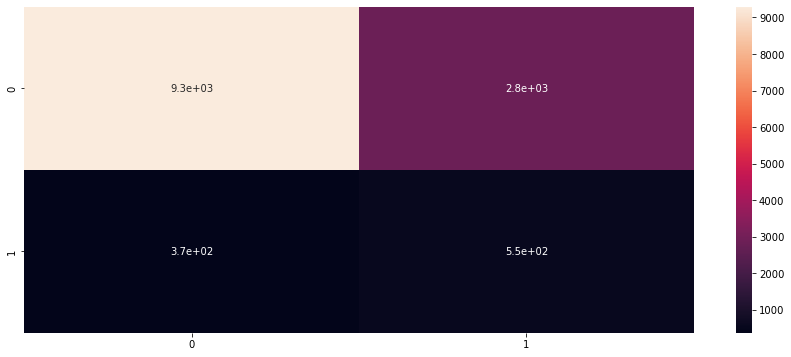

In [98]:
classification(x_train_smt,y_train_smt,x_test,y_test,knn)